In [2]:
!pip install --user git+https://github.com/rtqichen/torchdiffeq.git

project_dir = "odenet"
import sys
if False: # On colab
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    root = "/content/drive/My Drive/Colab Notebooks/"+project_dir
    sys.path.append(root)
else: # Local
    root = './'

  Cloning https://github.com/rtqichen/torchdiffeq.git to /tmp/pip-req-build-6kxtxqep
  Running setup.py bdist_wheel for torchdiffeq ... done
  Stored in directory: /tmp/pip-ephem-wheel-cache-1m5i7zfz/wheels/f1/89/ce/78b4c1aabbb8dad56a2dbd776f9ffcbeca103b2ddae40d094b
Successfully built torchdiffeq
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
# For the aws instance
!pip install --user git+https://github.com/rtqichen/torchdiffeq.git
!pip install --user torchvision

    100% |████████████████████████████████| 10.2MB 5.1MB/s 
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [33]:
import torch
from matplotlib import pylab as plt
from odenet import datasets
from odenet.odenet_cifar10 import ODEResNet
from odenet import refine_train

import importlib
importlib.reload(refine_train)
from odenet.helper import set_seed, get_device, which_device
#importlib.reload(odenet_cifar10)

In [2]:
set_seed()
device = get_device()

Connected to a GPU


In [3]:
refset,trainset,trainloader,testset,testloader \
    = datasets.get_dataset('CIFAR10',root='../data/')

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


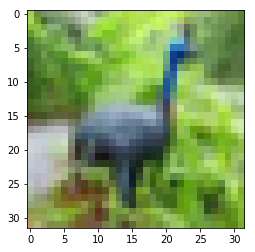

In [23]:
plt.imshow(refset.data[6],cmap='gray')

In [35]:
def do_a_train_set(ALPHA,method, N_epochs, N_adapt, lr):
    model = ODEResNet(ALPHA=ALPHA,method=method,in_channels=3).to(device)
    res = refine_train.train_adapt(model, trainloader, torch.nn.CrossEntropyLoss(),
                N_epochs, N_adapt, lr=lr, device=device)
    plt.semilogy(res[1])
    for r in res[2]:
        plt.axvline(r,color='k')
    return res

In [ ]:
stash = {}
for method in ['euler','midpoint','rk4']:
    res = do_a_train_set(16,method,5,4, 1.0e-4)
    stash[method] = res

Starting with  100666 with lr =  0.0001
tensor(1.7048)
Adapting to  197658 with lr =  1e-05
tensor(1.8150)
Adapting to  391642 with lr =  1e-05
tensor(1.8919)
Adapting to  779610 with lr =  1.0000000000000002e-06
tensor(2.1390)
Starting with  100666 with lr =  0.0001
tensor(2.1617)
Adapting to  197658 with lr =  1e-05
tensor(1.9149)
Adapting to  391642 with lr =  1e-05


In [ ]:
model_euler = ODEResNet(ALPHA=16,method='euler').to(device)
RES_euler = refine_train.train_adapt(model_euler, trainloader, torch.nn.CrossEntropyLoss(),
                                     2, 4, lr=1.0e-3, device=device)
plt.semilogy(RES_euler[1])
for r in RES_euler[2]:
    plt.axvline(r,color='k')

Starting with  100666 with lr =  0.001
Adapting to  197658 with lr =  0.0001
Adapting to  391642 with lr =  0.0001
Adapting to  779610 with lr =  1e-05


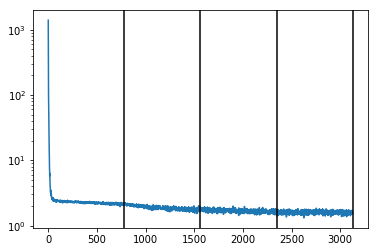

In [25]:
model_rk4 = ODEResNet(ALPHA=16,method='rk4').to(device)
RES_rk4 = \
    refine_train.train_adapt(model_rk4, trainloader, torch.nn.CrossEntropyLoss(),
                             2, 4, lr=1.0e-3, device=device)
plt.semilogy(RES_rk4[1])
for r in RES_rk4[2]:
    plt.axvline(r,color='k')

In [ ]:
model_mid = ODEResNet(ALPHA=16,method='midpoint').to(device)
RES_mid = \
    refine_train.train_adapt(model_mid, trainloader, torch.nn.CrossEntropyLoss(),
                             5, 4, lr=1.0e-4, device=device)
plt.semilogy(RES_mid[1])
for r in RES_mid[2]:
    plt.axvline(r,color='k')

Starting with  100666 with lr =  0.001
Adapting to  197658 with lr =  0.0001


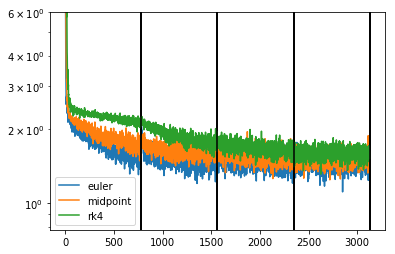

In [27]:
res = {
    'euler':RES_euler,
    'midpoint':RES_mid,
    'rk4':RES_rk4
}
for k,RES in res.items():
    plt.semilogy(RES[1],label=k)
    for r in RES[2]:
        plt.axvline(r,color='k')
plt.ylim(top=6)
plt.legend()

In [34]:
for k,(model_list,losses,refine_steps) in res.items():
    print(k)
    for m in model_list:
        print(refine_train.model_acc(m,testloader))

euler
tensor(0.4688)
tensor(0.4297)
tensor(0.5000)
tensor(0.4609)
midpoint
tensor(0.4219)
tensor(0.4297)
tensor(0.4141)
tensor(0.4219)
rk4
tensor(0.1875)
tensor(0.3438)
tensor(0.4453)
tensor(0.3672)


In [ ]:
refset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']